## Homework 5
Nahum Tilahun | Student ID: 1620183

In [6]:
#import cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare
from scipy import stats

In [7]:
#a
def plotter(SNR, label):
    mu = np.sqrt(SNR)
    sigma = 1
    x = np.arange(-8, 8, 0.01)
    pdf = norm.pdf(x ,mu, sigma)
    plt.plot(x, pdf, label = label)
    return pdf

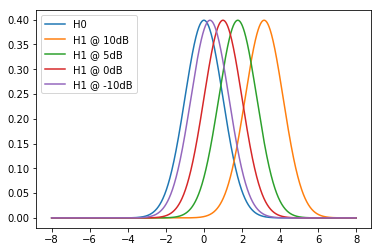

In [8]:
y1 = plotter(0, 'H0')
y2 = plotter(10, 'H1 @ 10dB')
y3 = plotter(np.sqrt(10), 'H1 @ 5dB')
y4 = plotter(1, 'H1 @ 0dB')
y5 = plotter(0.1, 'H1 @ -10dB')
plt.legend()

In [9]:
#b
def cdfPlotter(pdf, label):
    cdf = np.cumsum(pdf)/100
    plt.plot(cdf, label = label)
    return cdf

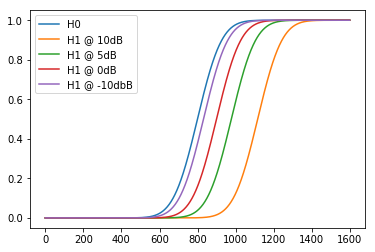

In [10]:
c1 = cdfPlotter(y1, 'H0')
c2 = cdfPlotter(y2, 'H1 @ 10dB')
c3 = cdfPlotter(y3, 'H1 @ 5dB')
c4 = cdfPlotter(y4, 'H1 @ 0dB')
c5 = cdfPlotter(y5, 'H1 @ -10dbB')
plt.legend()

In [11]:
#c
def ccdfPlotter(pdf, label):
    ccdf = 1 - np.cumsum(pdf)/100
    plt.plot(ccdf, label = label)
    return ccdf

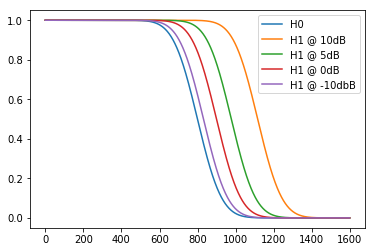

In [12]:
cc1 = ccdfPlotter(y1, 'H0')
cc2 = ccdfPlotter(y2, 'H1 @ 10dB')
cc3 = ccdfPlotter(y3, 'H1 @ 5dB')
cc4 = ccdfPlotter(y4, 'H1 @ 0dB')
cc5 = ccdfPlotter(y5, 'H1 @ -10dbB')
plt.legend()

In [13]:
#d
def ROC(ccdf_null, ccdf_alt, label):
    plt.plot(ccdf_null, ccdf_alt, label = label)

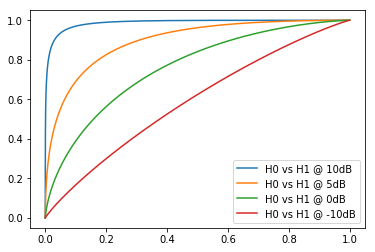

In [14]:
ROC(cc1, cc2, 'H0 vs H1 @ 10dB')
ROC(cc1, cc3, 'H0 vs H1 @ 5dB')
ROC(cc1, cc4, 'H0 vs H1 @ 0dB')
ROC(cc1, cc5, 'H0 vs H1 @ -10dB')
plt.legend()

In [28]:
#e
def compare(N, SNR):
    count = 0
    for i in range(N):
        null = np.random.normal(0, 1, N)
        alt = np.random.normal(np.sqrt(SNR), 1, N)
        if alt[i] > null[i]:
            count = count + 1
        else:
            count = count
    
    ans = count / N
    print(ans)    

In [29]:
compare(1000, 10)
compare(1000, np.sqrt(10))
compare(1000, 1)
compare(1000, 0.1)

0.986
0.908
0.753
0.574


In [38]:
#2
def qqplot(SNR, label):
    mu = np.sqrt(SNR)
    sig = 1
    x = np.arange(-8, 8, 0.01)
    #creates ppf of alternative hyp
    ppf1 = norm.ppf(x, mu, sig)
    #creates ppf of null hyp
    ppf2 = norm.ppf(x, 0, 1)
    #plots them against each other in a Q-Q plot
    plt.plot(ppf2, ppf1, label= label)

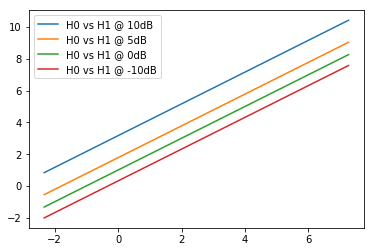

In [39]:
qqplot(10, "H0 vs H1 @ 10dB")
qqplot(np.sqrt(10), "H0 vs H1 @ 5dB")
qqplot(1, "H0 vs H1 @ 0dB")
qqplot(0.1, "H0 vs H1 @ -10dB")
plt.legend()